In [1]:
import pandas as pd


# Gradient boosting machines

In [2]:
# !pip install xgboost

import xgboost as xgb
from util.functions import impute_and_train

df_without_diabetes = pd.read_csv('processed/df_without_diabetes.csv')

results = impute_and_train(df_without_diabetes, xgb.XGBClassifier)

    

learning with mean imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with median imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with mode imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with KNN imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with MICE imputed data
Cross-validation iteration 1/5


/Users/luisastue/miniconda3/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with iterative imputed data
Cross-validation iteration 1/5


/Users/luisastue/miniconda3/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5


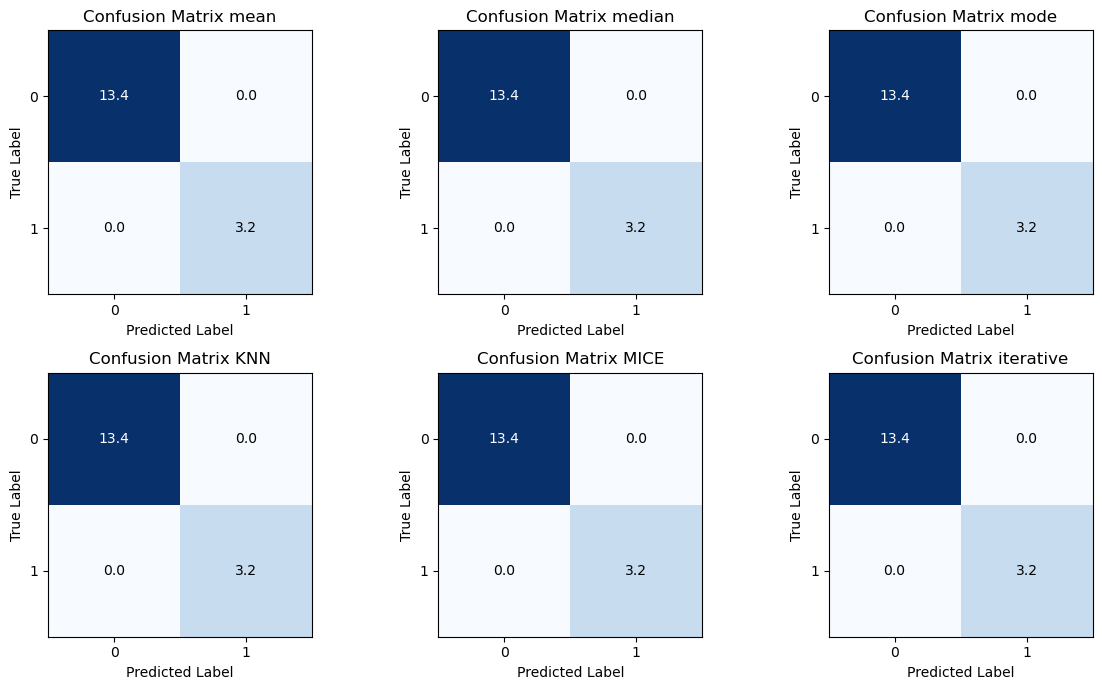

In [3]:
from util.functions import plot_mean_confusion_matrices
plot_mean_confusion_matrices(results['confusion_matrices'])

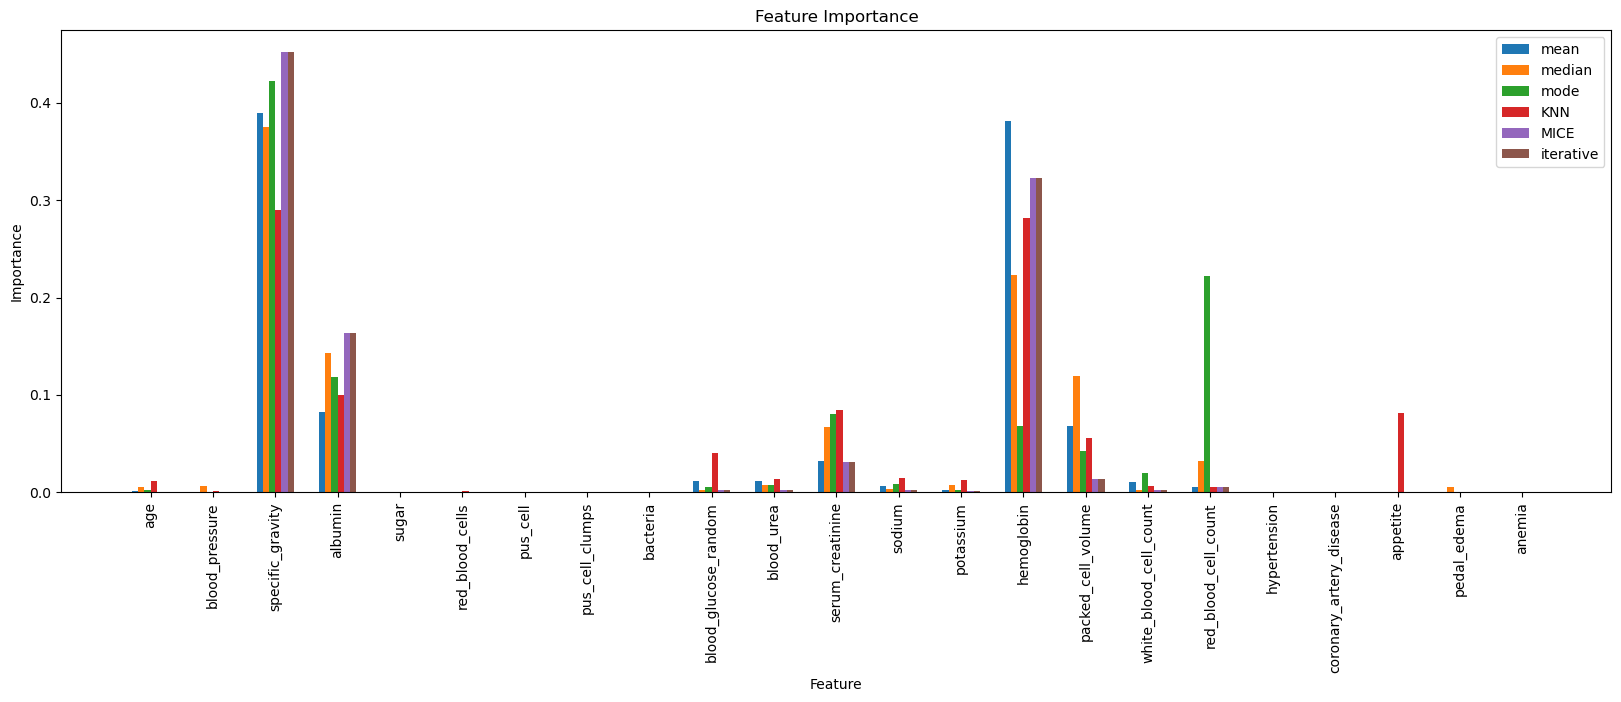

In [4]:
from util.functions import plot_feature_importances
# plot all feature importances as subplots
import pandas as pd
import numpy as np

feature_importances = {}
for (name, models) in results['models'].items():
    fi = []
    for i, model in enumerate(models):
        fi.append(model.feature_importances_)

    feature_importances[name] = pd.DataFrame(np.mean(fi, axis=0), index=df_without_diabetes.drop(columns=['class']).columns, columns=['Importance'])

plot_feature_importances(feature_importances)
